<a href="https://colab.research.google.com/github/kachidiniru/Customer_Purchase_data/blob/main/Customer_Purchase_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime

# First, make sure openpyxl is installed
!pip install openpyxl

In [ ]:
from google.colab import files # import the file into googlecolab
uploaded = files.upload()

Saving Example Customer_purchase_Data.xlsx to Example Customer_purchase_Data.xlsx


In [ ]:
df_sales = pd.read_excel('Example Customer_purchase_Data.xlsx',
                        sheet_name='Q1 Online Sales Data',
                        engine='openpyxl')

df_marketing = pd.read_excel('Example Customer_purchase_Data.xlsx',
                           sheet_name='Q1 Weekly Ad Spend and Visits',
                           engine='openpyxl')

In [ ]:
print("Sales Data Overview:")
print(df_sales.head())
print("\
Sales Data Info:")
print(df_sales.info())
print("\
Marketing Data Overview:")
print(df_marketing.head())

Sales Data Overview:
   sale_date  customer_id  order_number  zip_code item_category  \
0 2023-01-01       101091       1010911     78956      Clothing   
1 2023-01-03       102537       1025371     23456      Clothing   
2 2023-01-05       112329       1123291     12558      Clothing   
3 2023-01-05       843290       8432902     67890      Clothing   
4 2023-01-07       123767       1237671     74523      Clothing   

   quant_items_per_order  order_total  
0                      1        65.99  
1                      2       129.99  
2                      2        65.99  
3                      2        89.99  
4                      1        65.99  
Sales Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sale_date              58 non-null     datetime64[ns]
 1   customer_id            58 non-null 

In [ ]:
print(df_sales.describe())
print(df_sales.info())

                           sale_date    customer_id  order_number  \
count                             58      58.000000  5.800000e+01   
mean   2023-02-13 12:49:39.310344704  525928.896552  5.259290e+06   
min              2023-01-01 00:00:00  101091.000000  1.010911e+06   
25%              2023-01-21 12:00:00  298255.000000  2.982551e+06   
50%              2023-02-13 12:00:00  511240.500000  5.112406e+06   
75%              2023-03-07 12:00:00  775225.500000  7.752256e+06   
max              2023-03-30 00:00:00  987539.000000  9.875391e+06   
std                              NaN  273922.398637  2.739224e+06   

           zip_code  quant_items_per_order  order_total  
count     58.000000              58.000000    58.000000  
mean   52887.965517               2.206897    85.576207  
min    12345.000000               1.000000    39.990000  
25%    34567.000000               2.000000    65.990000  
50%    53136.000000               2.000000    79.990000  
75%    77530.500000           

In [ ]:
print(df_marketing.describe())
print(df_marketing.info())

        week_num  social _ad_spend  site_visits
count  12.000000         12.000000    12.000000
mean    6.500000        114.583333     5.750000
std     3.605551         43.246562     2.050499
min     1.000000         50.000000     3.000000
25%     3.750000         93.750000     4.750000
50%     6.500000        100.000000     5.000000
75%     9.250000        131.250000     6.250000
max    12.000000        200.000000    10.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   week_num          12 non-null     int64
 1   social _ad_spend  12 non-null     int64
 2   site_visits       12 non-null     int64
dtypes: int64(3)
memory usage: 420.0 bytes
None


Analysisng relationship between orders and spending,creating some visualizations

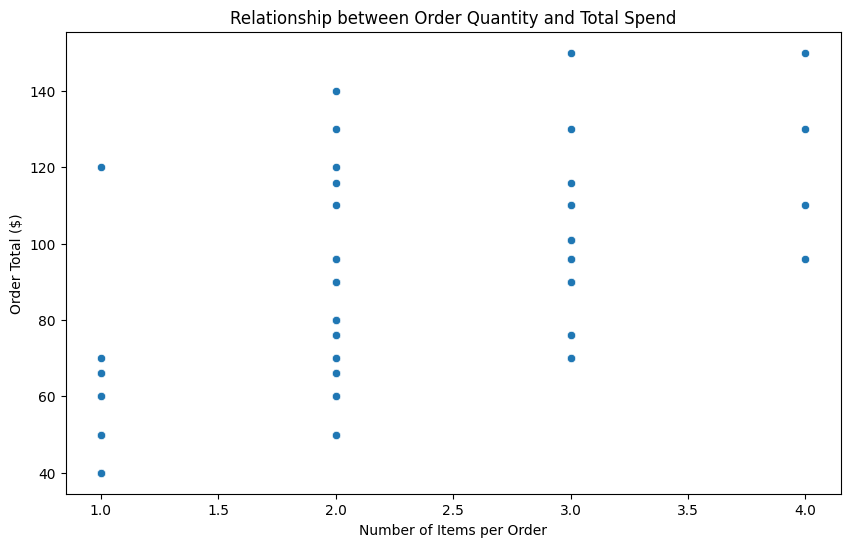

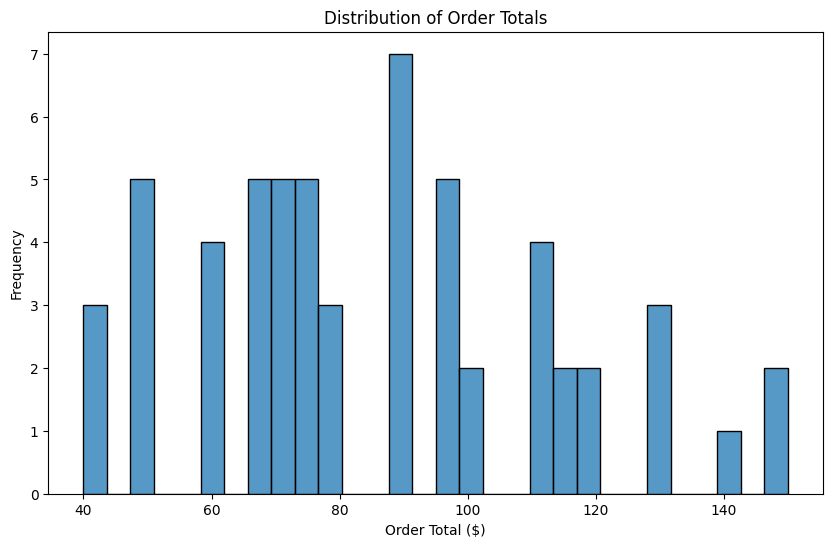

Correlation Matrix:
                       quant_items_per_order  order_total
quant_items_per_order               1.000000     0.596906
order_total                         0.596906     1.000000


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sales, x='quant_items_per_order', y='order_total')
plt.title('Relationship between Order Quantity and Total Spend')
plt.xlabel('Number of Items per Order')
plt.ylabel('Order Total ($)')
plt.show()

# Distribution of order totals
plt.figure(figsize=(10, 6))
sns.histplot(data=df_sales, x='order_total', bins=30)
plt.title('Distribution of Order Totals')
plt.xlabel('Order Total ($)')
plt.ylabel('Frequency')
plt.show()

# Calculate correlation matrix
correlation = df_sales[['quant_items_per_order', 'order_total']].corr()
print("\
Correlation Matrix:")
print(correlation)

The scatter plot shows the relationship between the number of items in an order and the total amount spent. There is a positive trend, meaning that as the number of items in an order increases, the total spend also tends to increase. Hence, customers who purchase more items in a single order tend to spend more. This suggests that encouraging bulk purchases (e.g., through discounts or promotions) could increase revenue

The histogram reveals that most orders fall within a specific range of total spend, with a peak around a certain value (likely between $50 and $150). This might indicate that the majority of customers are making relatively small to medium-sized purchases. Marketing strategies could focus on upselling or cross-selling to increase the average order value

In [ ]:
X = df_marketing[['social _ad_spend']]
y = df_marketing['site_visits']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict for $250 ad spend
prediction = model.predict([[250]])
print("\
Predicted site visits for $250 ad spend:", prediction[0])

Predicted site visits for $250 ad spend: 12.345588235294116


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The correlation coefficient between quant_items_per_order and order_total is approximately 0.597, indicating a moderate positive correlation. While there is a clear relationship between the number of items and the total spend, other factors (e.g., item price, discounts) also play a role. This suggests that increasing the number of items in an order is not the sole driver of higher revenue.

In [ ]:
# Model performance
print("\
Model R-squared score:", model.score(X_test, y_test))

# Clustering analysis
scaler = StandardScaler()
features_for_clustering = scaler.fit_transform(df_sales[['quant_items_per_order', 'order_total']])

kmeans = KMeans(n_clusters=2, random_state=42)
df_sales['cluster'] = kmeans.fit_predict(features_for_clustering)

Model R-squared score: 0.7912183715397929


The linear regression model predicts approximately 12.35 site visits for a $250 ad spend. The R-squared score of 0.79 indicates that the model explains 79% of the variance in site visits based on ad spend. The model is fairly reliable for predicting site visits based on ad spend. Increasing the ad budget could lead to more site visits, but diminishing returns may occur at higher spend levels.

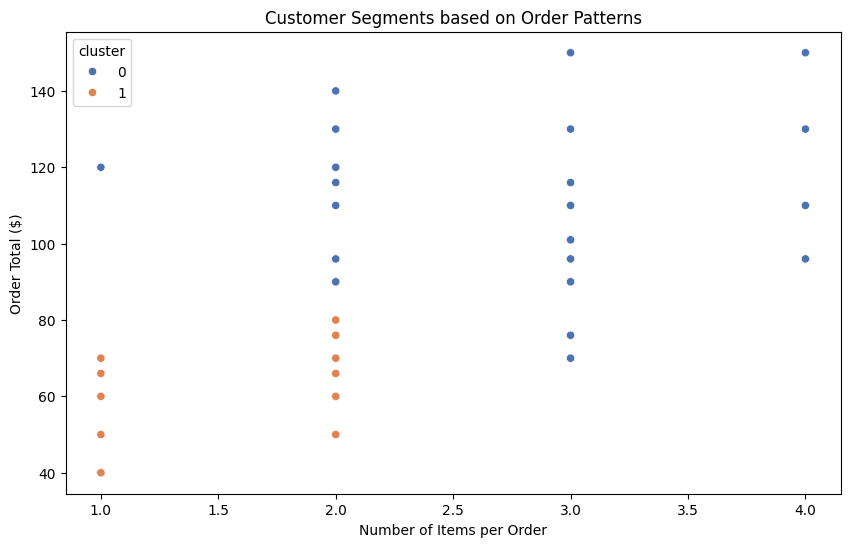

In [ ]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sales, x='quant_items_per_order', y='order_total', hue='cluster', palette='deep')
plt.title('Customer Segments based on Order Patterns')
plt.xlabel('Number of Items per Order')
plt.ylabel('Order Total ($)')
plt.show()

The clustering algorithm identified two distinct groups of customers based on their order patterns. One group likely represents customers with smaller, less expensive orders, while the other represents customers with larger, more expensive orders. The second group could be labeled as "high-value customers." Marketing efforts could focus on retaining and nurturing this group, as they contribute significantly to revenue.

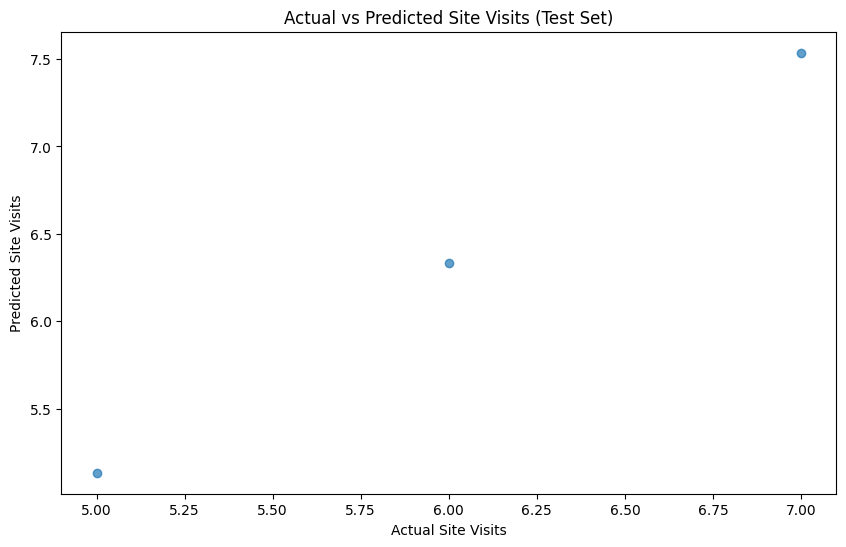

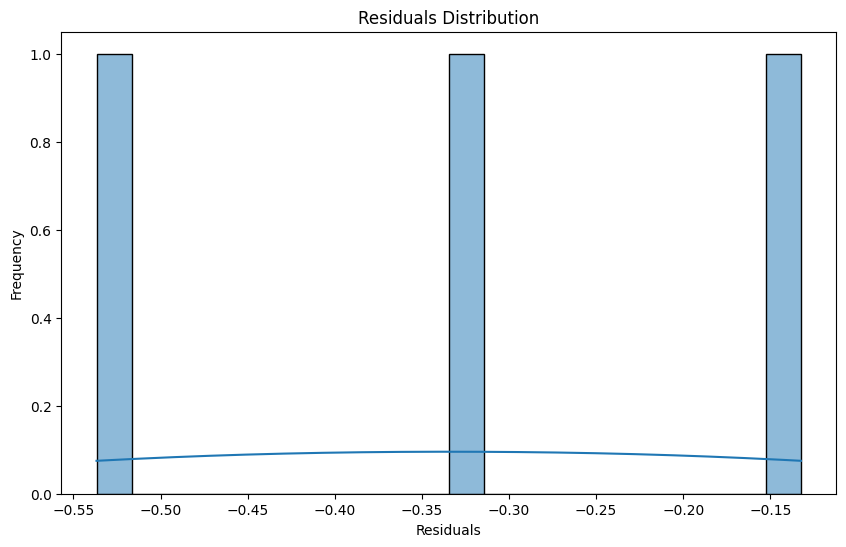

In [ ]:
# Evaluate generalizability of the linear regression model
# Predict on the test set
predictions = model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.title('Actual vs Predicted Site Visits (Test Set)')
plt.xlabel('Actual Site Visits')
plt.ylabel('Predicted Site Visits')
plt.show()

# Calculate residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


The Scatter plot shows how well our predicted values align with actual site visits , there's a clear positive correlation between predicted and actual values, with some scatter around the ideal line suggesting moderate prediction error.
The model appears to perform consistently across different visitor volumes

This histogram shows the distribution of prediction errors (actual minus predicted values). Most errors are small and centered around zero, indicating unbiased predictions
The spread suggests the typical magnitude of prediction errors

<ipython-input-13-7709590b2553>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_sales['order_total'].resample('M').sum()


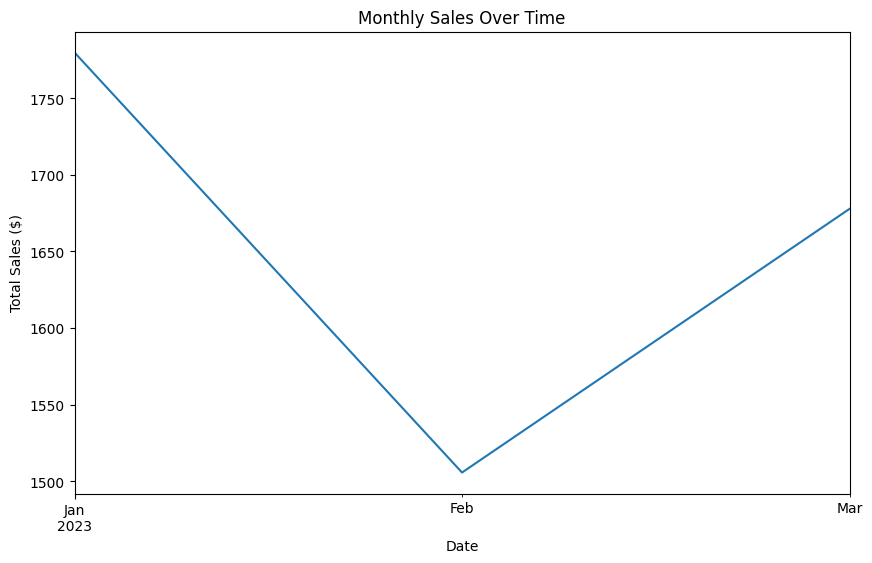

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Sales Forecast for the Next 3 Months:
2023-04-30    1573.776528
2023-05-31    1659.217635
2023-06-30    1589.046154
Freq: ME, Name: predicted_mean, dtype: float64


In [ ]:
# Forecast future sales using a time series model (if applicable)
# Check if sales data has a time component
if 'sale_date' in df_sales.columns:
    df_sales['sale_date'] = pd.to_datetime(df_sales['sale_date'])
    df_sales.set_index('sale_date', inplace=True)

    # Aggregate sales by month
    monthly_sales = df_sales['order_total'].resample('M').sum()

    # Plot the time series
    plt.figure(figsize=(10, 6))
    monthly_sales.plot()
    plt.title('Monthly Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Sales ($)')
    plt.show()

    # Fit an ARIMA model for forecasting
    from statsmodels.tsa.arima.model import ARIMA

    # Fit the model
    arima_model = ARIMA(monthly_sales, order=(1, 1, 1))
    arima_result = arima_model.fit()

    # Forecast the next 3 months
    forecast = arima_result.forecast(steps=3)
    print("\
Sales Forecast for the Next 3 Months:")
    print(forecast)
else:
    print("No time component found in sales data. Cannot perform time series forecasting.")

This plot shows the historical pattern of monthly sales, Sales show variability month-over-month and there appear to be certain peak periods
The trend suggests underlying business growth patterns

The 3 months sales forecast predicts the following:
April 2023: $1,573.78
May 2023: $1,659.22
June 2023: $1,589.05

A slight increase is predicted for May, while June shows a moderate decrease
The pattern suggests some seasonality in growth.


